In [1]:
from preamble import *

## 텍스트 데이터 다루기

### 문자열 데이터 타입
#### 예제 어플리케이션: 영화 리뷰 감성 분석

In [2]:
! wget -nc http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz -P data
! tar xzf data/aclImdb_v1.tar.gz --skip-old-files -C data

`data/aclImdb_v1.tar.gz' 파일이 이미 있습니다. 가져오지 않음.

tar: Option --skip-old-files is not supported
Usage:
  List:    tar -tf <archive-filename>
  Extract: tar -xf <archive-filename>
  Create:  tar -cf <archive-filename> [filenames...]
  Help:    tar --help


In [3]:
# !은 셸(shell) 명령을 실행해주는 IPython의 매직 명령어입니다.
# tree 명령이 없다면 find ./data -type d 명령을 사용해 하위 폴더의 목록을 
# 볼 수 있습니다. 윈도에서는 !tree data/aclImdb 와 같이 사용하세요.
# !tree -dL 2 data/aclImdb
!find ./data -type d

./data
./data/aclImdb
./data/aclImdb/test
./data/aclImdb/test/neg
./data/aclImdb/test/pos
./data/aclImdb/train
./data/aclImdb/train/neg
./data/aclImdb/train/pos


In [4]:
!rm -r data/aclImdb/train/unsup

rm: data/aclImdb/train/unsup: No such file or directory


In [5]:
from sklearn.datasets import load_files

reviews_train = load_files("data/aclImdb/train/")
# 텍스트와 레이블을 포함하고 있는 Bunch 오브젝트를 반환합니다.
text_train, y_train = reviews_train.data, reviews_train.target
print("text_train의 타입:", type(text_train))
print("text_train의 길이:", len(text_train))
print("text_train[6]:\n", text_train[6])

text_train의 타입: <class 'list'>
text_train의 길이: 25000
text_train[6]:
 b"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.<br /><br />Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life. <br /><br />I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."


In [6]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [7]:
print("클래스별 샘플 수 (훈련 데이터):", np.bincount(y_train))

클래스별 샘플 수 (훈련 데이터): [12500 12500]


In [8]:
reviews_test = load_files("data/aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target
print("테스트 데이터의 문서 수:", len(text_test))
print("클래스별 샘플 수 (테스트 데이터):", np.bincount(y_test))
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

테스트 데이터의 문서 수: 25000
클래스별 샘플 수 (테스트 데이터): [12500 12500]


### 텍스트 데이터를 BOW로 표현하기

#### 샘플 데이터에 BOW 적용하기

In [9]:
bards_words =["The fool doth think he is wise,",
              "but the wise man knows himself to be a fool"]

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(bards_words)

CountVectorizer()

In [11]:
print("어휘 사전의 크기:", len(vect.vocabulary_))
print("어휘 사전의 내용:\n", vect.vocabulary_)

어휘 사전의 크기: 13
어휘 사전의 내용:
 {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


In [12]:
bag_of_words = vect.transform(bards_words)
print("BOW:", repr(bag_of_words))

BOW: <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


In [13]:
print("BOW의 밀집 표현:\n", bag_of_words.toarray())

BOW의 밀집 표현:
 [[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


### 영화 리뷰에 대한 BOW

In [14]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print("X_train:\n", repr(X_train))

X_train:
 <25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>


In [15]:
# get_feature_names() 메서드가 1.0에서 deprecated 되었고 1.2 버전에서 삭제될 예정입니다.
# 대신 get_feature_names_out()을 사용합니다.
feature_names = vect.get_feature_names_out()
print("특성 개수:", len(feature_names))
print("처음 20개 특성:\n", feature_names[:20])
print("20010에서 20030까지 특성:\n", feature_names[20010:20030])
print("매 2000번째 특성:\n", feature_names[::2000])

특성 개수: 74849
처음 20개 특성:
 ['00' '000' '0000000000001' '00001' '00015' '000s' '001' '003830' '006'
 '007' '0079' '0080' '0083' '0093638' '00am' '00pm' '00s' '01' '01pm' '02']
20010에서 20030까지 특성:
 ['dratted' 'draub' 'draught' 'draughts' 'draughtswoman' 'draw' 'drawback'
 'drawbacks' 'drawer' 'drawers' 'drawing' 'drawings' 'drawl' 'drawled'
 'drawling' 'drawn' 'draws' 'draza' 'dre' 'drea']
매 2000번째 특성:
 ['00' 'aesir' 'aquarian' 'barking' 'blustering' 'bête' 'chicanery'
 'condensing' 'cunning' 'detox' 'draper' 'enshrined' 'favorit' 'freezer'
 'goldman' 'hasan' 'huitieme' 'intelligible' 'kantrowitz' 'lawful' 'maars'
 'megalunged' 'mostey' 'norrland' 'padilla' 'pincher' 'promisingly'
 'receptionist' 'rivals' 'schnaas' 'shunning' 'sparse' 'subset'
 'temptations' 'treatises' 'unproven' 'walkman' 'xylophonist']


In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(LogisticRegression(max_iter=1000), X_train, y_train, cv=5)
print("크로스 밸리데이션 평균 점수: {:.2f}".format(np.mean(scores)))

크로스 밸리데이션 평균 점수: 0.88


In [17]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=5)
grid.fit(X_train, y_train)
print("최상의 크로스 밸리데이션 점수: {:.2f}".format(grid.best_score_))
print("최적의 매개변수: ", grid.best_params_)

최상의 크로스 밸리데이션 점수: 0.89
최적의 매개변수:  {'C': 0.1}


In [18]:
X_test = vect.transform(text_test)
print("테스트 점수: {:.2f}".format(grid.score(X_test, y_test)))

테스트 점수: 0.88


In [19]:
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("min_df로 제한한 X_train:", repr(X_train))

min_df로 제한한 X_train: <25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>


In [20]:
# get_feature_names() 메서드가 1.0에서 deprecated 되었고 1.2 버전에서 삭제될 예정입니다.
# 대신 get_feature_names_out()을 사용합니다.
feature_names = vect.get_feature_names_out()

print("First 50 features:\n", feature_names[:50])
print("Features 20010 to 20030:\n", feature_names[20010:20030])
print("Every 700th feature:\n", feature_names[::700])

First 50 features:
 ['00' '000' '007' '00s' '01' '02' '03' '04' '05' '06' '07' '08' '09' '10'
 '100' '1000' '100th' '101' '102' '103' '104' '105' '107' '108' '10s'
 '10th' '11' '110' '112' '116' '117' '11th' '12' '120' '12th' '13' '135'
 '13th' '14' '140' '14th' '15' '150' '15th' '16' '160' '1600' '16mm' '16s'
 '16th']
Features 20010 to 20030:
 ['repentance' 'repercussions' 'repertoire' 'repetition' 'repetitions'
 'repetitious' 'repetitive' 'rephrase' 'replace' 'replaced' 'replacement'
 'replaces' 'replacing' 'replay' 'replayable' 'replayed' 'replaying'
 'replays' 'replete' 'replica']
Every 700th feature:
 ['00' 'affections' 'appropriately' 'barbra' 'blurbs' 'butchered' 'cheese'
 'commitment' 'courts' 'deconstructed' 'disgraceful' 'dvds' 'eschews'
 'fell' 'freezer' 'goriest' 'hauser' 'hungary' 'insinuate' 'juggle'
 'leering' 'maelstrom' 'messiah' 'music' 'occasional' 'parking'
 'pleasantville' 'pronunciation' 'recipient' 'reviews' 'sas' 'shea'
 'sneers' 'steiger' 'swastika' 'thrusting'

In [21]:
grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=5)
grid.fit(X_train, y_train)
print("최적의 크로스 밸리데이션 점수: {:.2f}".format(grid.best_score_))

최적의 크로스 밸리데이션 점수: 0.89


### 불용어

In [22]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("불용어 개수:", len(ENGLISH_STOP_WORDS))
print("매 10번째 불용어:\n", list(ENGLISH_STOP_WORDS)[::10])

불용어 개수: 318
매 10번째 불용어:
 ['a', 'whole', 'cannot', 'have', 'could', 'see', 'often', 'yourselves', 'after', 'whatever', 'had', 'yet', 'off', 'anyway', 'you', 'sometime', 'nevertheless', 'were', 'everything', 'otherwise', 'indeed', 'seem', 'should', 'four', 'neither', 'former', 'go', 'part', 'ourselves', 'no', 'them', 'done']


In [23]:
# stop_words="english"라고 지정하면 내장된 불용어를 사용합니다.
# 내장된 불용어에 추가할 수도 있고 자신만의 목록을 사용할 수도 있습니다.
vect = CountVectorizer(min_df=5, stop_words="english").fit(text_train)
X_train = vect.transform(text_train)
print("불용어가 제거된 X_train:\n", repr(X_train))

불용어가 제거된 X_train:
 <25000x26966 sparse matrix of type '<class 'numpy.int64'>'
	with 2149958 stored elements in Compressed Sparse Row format>


In [24]:
grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=5)
grid.fit(X_train, y_train)
print("최상의 크로스 밸리데이션 점수: {:.2f}".format(grid.best_score_))

최상의 크로스 밸리데이션 점수: 0.88


In [25]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(CountVectorizer(), LogisticRegression(max_iter=5000))
param_grid = {'countvectorizer__max_df': [100, 1000, 10000, 20000], 'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("최상의 크로스 밸리데이션 점수: {:.2f}".format(grid.best_score_))
print(grid.best_params_)

최상의 크로스 밸리데이션 점수: 0.89
{'countvectorizer__max_df': 20000, 'logisticregression__C': 0.1}


In [26]:
len(grid.best_estimator_.named_steps['countvectorizer'].vocabulary_)

74840

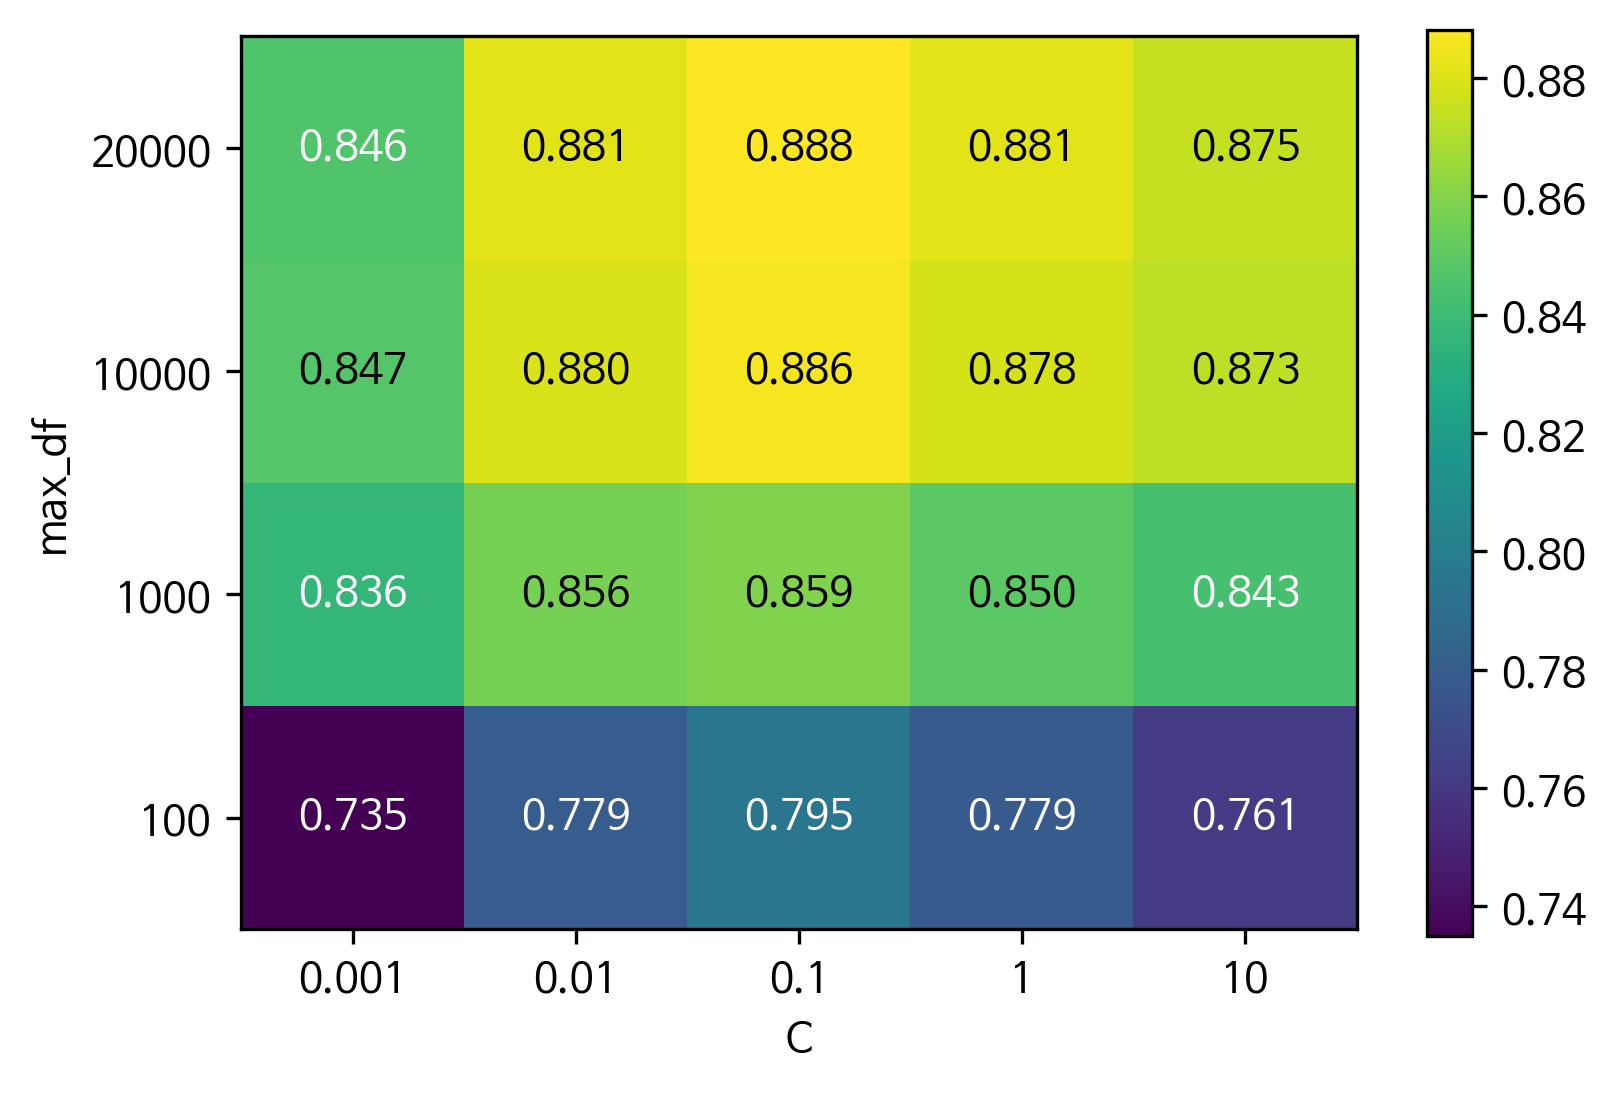

In [27]:
scores = grid.cv_results_['mean_test_score'].reshape(-1, 5)
# 히트맵을 그립니다
heatmap = mglearn.tools.heatmap(
    scores, xlabel="C", ylabel="max_df", cmap="viridis", fmt="%.3f",
    xticklabels=param_grid['logisticregression__C'],
    yticklabels=param_grid['countvectorizer__max_df'])
plt.colorbar(heatmap)
plt.show() # 책에는 없음

### tf–idf로 데이터 스케일 변경
\begin{equation*}
\text{tfidf}(w, d) = \text{tf} \times (\log\big(\frac{N + 1}{N_w + 1}\big) + 1)
\end{equation*}

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression(max_iter=5000))
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("최상의 크로스 밸리데이션 점수: {:.2f}".format(grid.best_score_))

최상의 크로스 밸리데이션 점수: 0.89


In [29]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
# 훈련 데이터셋을 변환합니다
X_train = vectorizer.transform(text_train)
# 특성별로 가장 큰 값을 찾습니다
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# get_feature_names() 메서드가 1.0에서 deprecated 되었고 1.2 버전에서 삭제될 예정입니다.
# 대신 get_feature_names_out()을 사용합니다.
# 특성 이름을 구합니다
feature_names = np.array(vectorizer.get_feature_names_out())

print("가장 낮은 tfidf를 가진 특성:\n",
      feature_names[sorted_by_tfidf[:20]])

print("가장 높은 tfidf를 가진 특성: \n",
      feature_names[sorted_by_tfidf[-20:]])

가장 낮은 tfidf를 가진 특성:
 ['suplexes' 'gauche' 'hypocrites' 'oncoming' 'songwriting' 'galadriel'
 'emerald' 'mclaughlin' 'sylvain' 'oversee' 'cataclysmic' 'pressuring'
 'uphold' 'thieving' 'inconsiderate' 'ware' 'denim' 'reverting' 'booed'
 'spacious']
가장 높은 tfidf를 가진 특성: 
 ['gadget' 'sucks' 'zatoichi' 'demons' 'lennon' 'bye' 'dev' 'weller'
 'sasquatch' 'botched' 'xica' 'darkman' 'woo' 'casper' 'doodlebops'
 'smallville' 'wei' 'scanners' 'steve' 'pokemon']


In [30]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print("가장 낮은 idf를 가진 특성:\n",
       feature_names[sorted_by_idf[:100]])

가장 낮은 idf를 가진 특성:
 ['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more' 'when'
 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really' 'story'
 'which' 'well' 'had' 'me' 'than' 'much' 'their' 'get' 'were' 'other'
 'been' 'do' 'most' 'don' 'her' 'also' 'into' 'first' 'made' 'how' 'great'
 'because' 'will' 'people' 'make' 'way' 'could' 'we' 'bad' 'after' 'any'
 'too' 'then' 'them' 'she' 'watch' 'think' 'acting' 'movies' 'seen' 'its'
 'him']


#### 모델 계수 조사

In [31]:
grid.best_estimator_.named_steps["logisticregression"].coef_

array([[-0.441, -0.484, -0.119, ...,  0.291, -0.089, -0.368]])

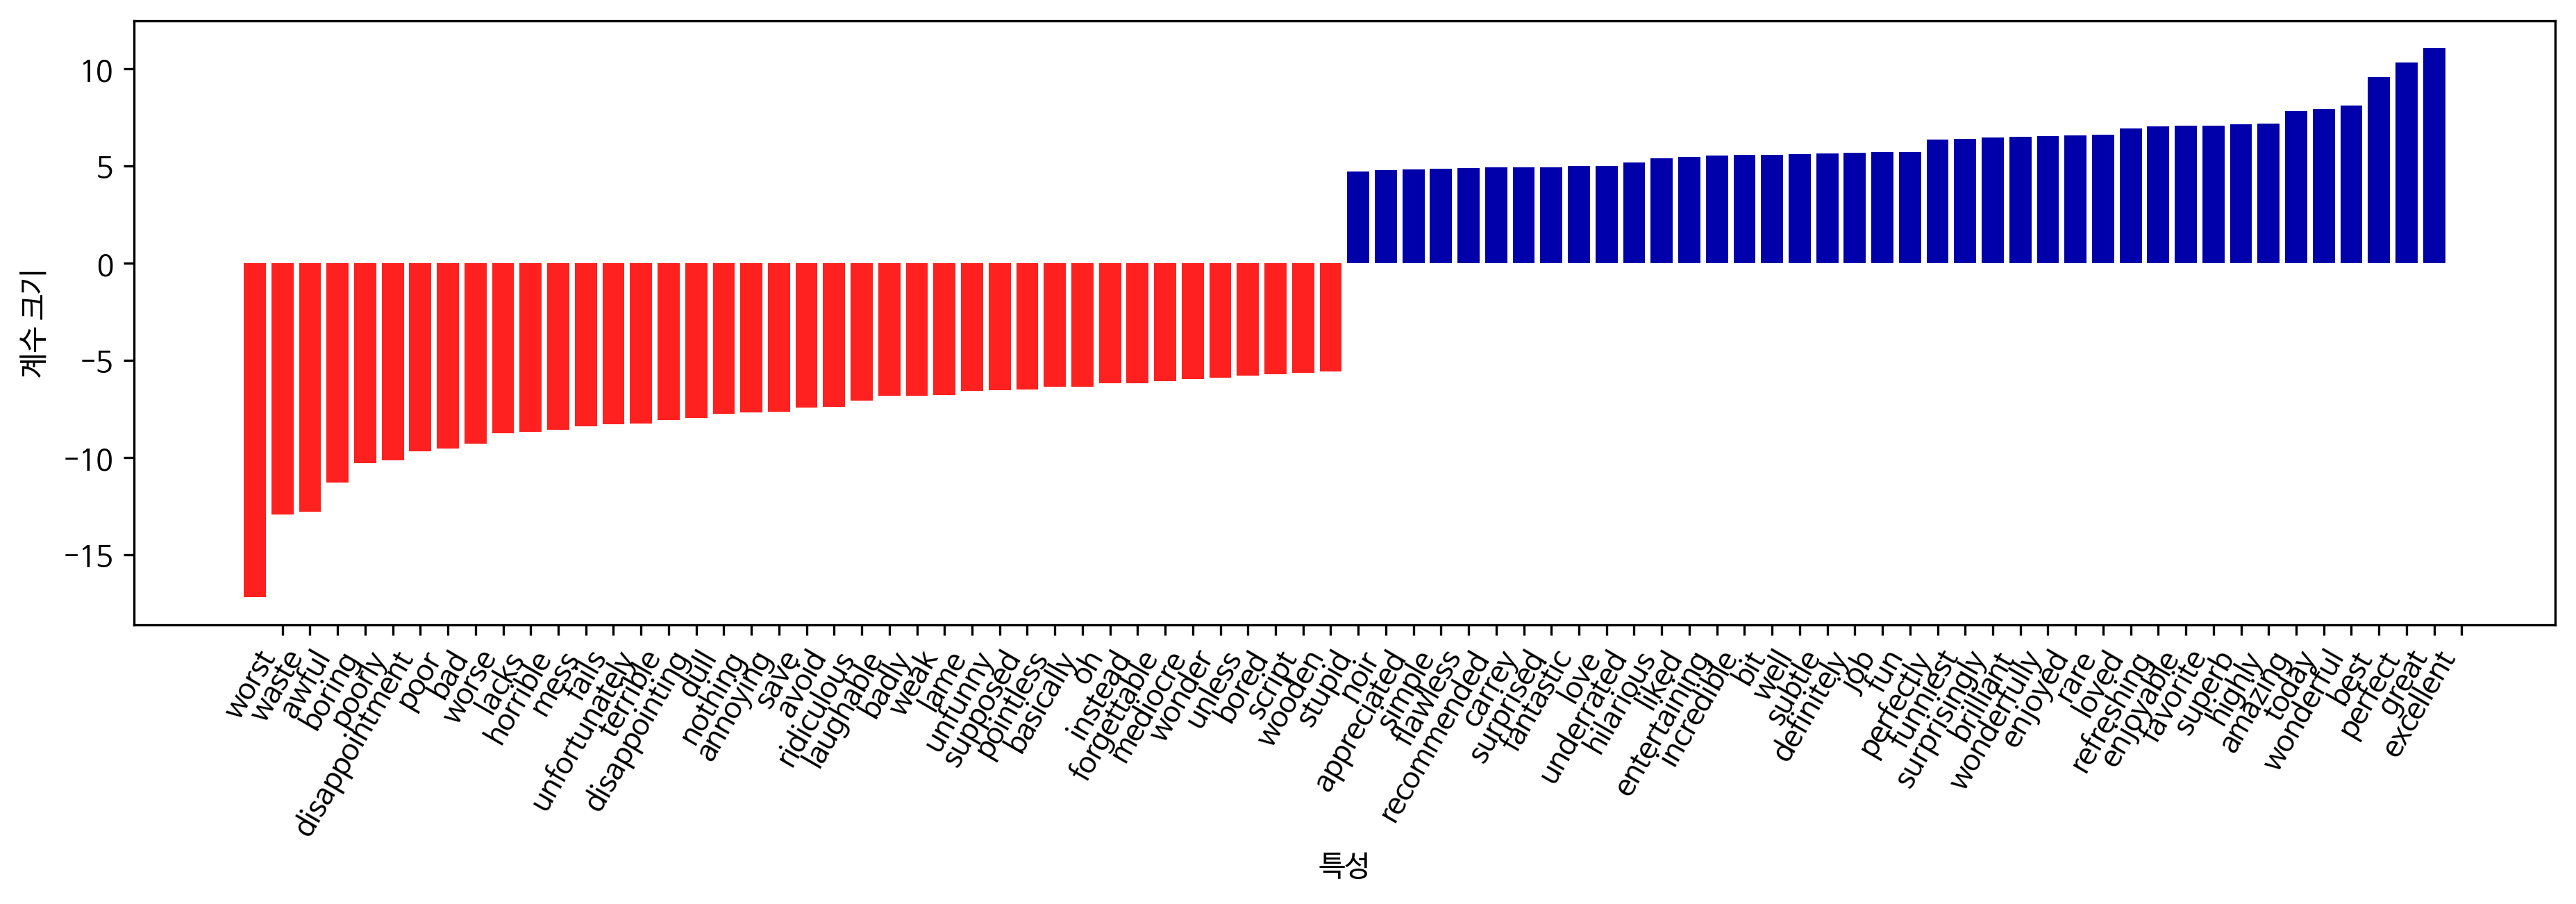

In [32]:
mglearn.tools.visualize_coefficients(
    grid.best_estimator_.named_steps["logisticregression"].coef_[0],
    feature_names, n_top_features=40)

#### 여러 단어로 만든 BOW (n-Grams)

In [33]:
print("bards_words:\n", bards_words)

bards_words:
 ['The fool doth think he is wise,', 'but the wise man knows himself to be a fool']


In [34]:
cv = CountVectorizer(ngram_range=(1, 1)).fit(bards_words)
print("어휘 사전 크기:", len(cv.vocabulary_))
# get_feature_names() 메서드가 1.0에서 deprecated 되었고 1.2 버전에서 삭제될 예정입니다.
# 대신 get_feature_names_out()을 사용합니다.
print("어휘 사전:\n", cv.get_feature_names_out())

어휘 사전 크기: 13
어휘 사전:
 ['be' 'but' 'doth' 'fool' 'he' 'himself' 'is' 'knows' 'man' 'the' 'think'
 'to' 'wise']


In [35]:
cv = CountVectorizer(ngram_range=(2, 2)).fit(bards_words)
print("어휘 사전 크기:", len(cv.vocabulary_))
# get_feature_names() 메서드가 1.0에서 deprecated 되었고 1.2 버전에서 삭제될 예정입니다.
# 대신 get_feature_names_out()을 사용합니다.
print("어휘 사전:\n", cv.get_feature_names_out())

어휘 사전 크기: 14
어휘 사전:
 ['be fool' 'but the' 'doth think' 'fool doth' 'he is' 'himself to'
 'is wise' 'knows himself' 'man knows' 'the fool' 'the wise' 'think he'
 'to be' 'wise man']


In [36]:
print("변환된 데이터 (밀집 배열):\n", cv.transform(bards_words).toarray())

변환된 데이터 (밀집 배열):
 [[0 0 1 1 1 0 1 0 0 1 0 1 0 0]
 [1 1 0 0 0 1 0 1 1 0 1 0 1 1]]


In [37]:
cv = CountVectorizer(ngram_range=(1, 3)).fit(bards_words)
print("어휘 사전 크기:", len(cv.vocabulary_))
# get_feature_names() 메서드가 1.0에서 deprecated 되었고 1.2 버전에서 삭제될 예정입니다.
# 대신 get_feature_names_out()을 사용합니다.
print("어휘 사전:\n", cv.get_feature_names_out())

어휘 사전 크기: 39
어휘 사전:
 ['be' 'be fool' 'but' 'but the' 'but the wise' 'doth' 'doth think'
 'doth think he' 'fool' 'fool doth' 'fool doth think' 'he' 'he is'
 'he is wise' 'himself' 'himself to' 'himself to be' 'is' 'is wise'
 'knows' 'knows himself' 'knows himself to' 'man' 'man knows'
 'man knows himself' 'the' 'the fool' 'the fool doth' 'the wise'
 'the wise man' 'think' 'think he' 'think he is' 'to' 'to be' 'to be fool'
 'wise' 'wise man' 'wise man knows']


In [38]:
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression(max_iter=5000))
# 매개변수 조합이 많고 트라이그램이 포함되어 있기 때문에
# 그리드 서치 실행에 시간이 오래 걸립니다
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
              "tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("최상의 크로스 밸리데이션 점수: {:.2f}".format(grid.best_score_))
print("최적의 매개변수:\n", grid.best_params_)

최상의 크로스 밸리데이션 점수: 0.91
최적의 매개변수:
 {'logisticregression__C': 100, 'tfidfvectorizer__ngram_range': (1, 3)}


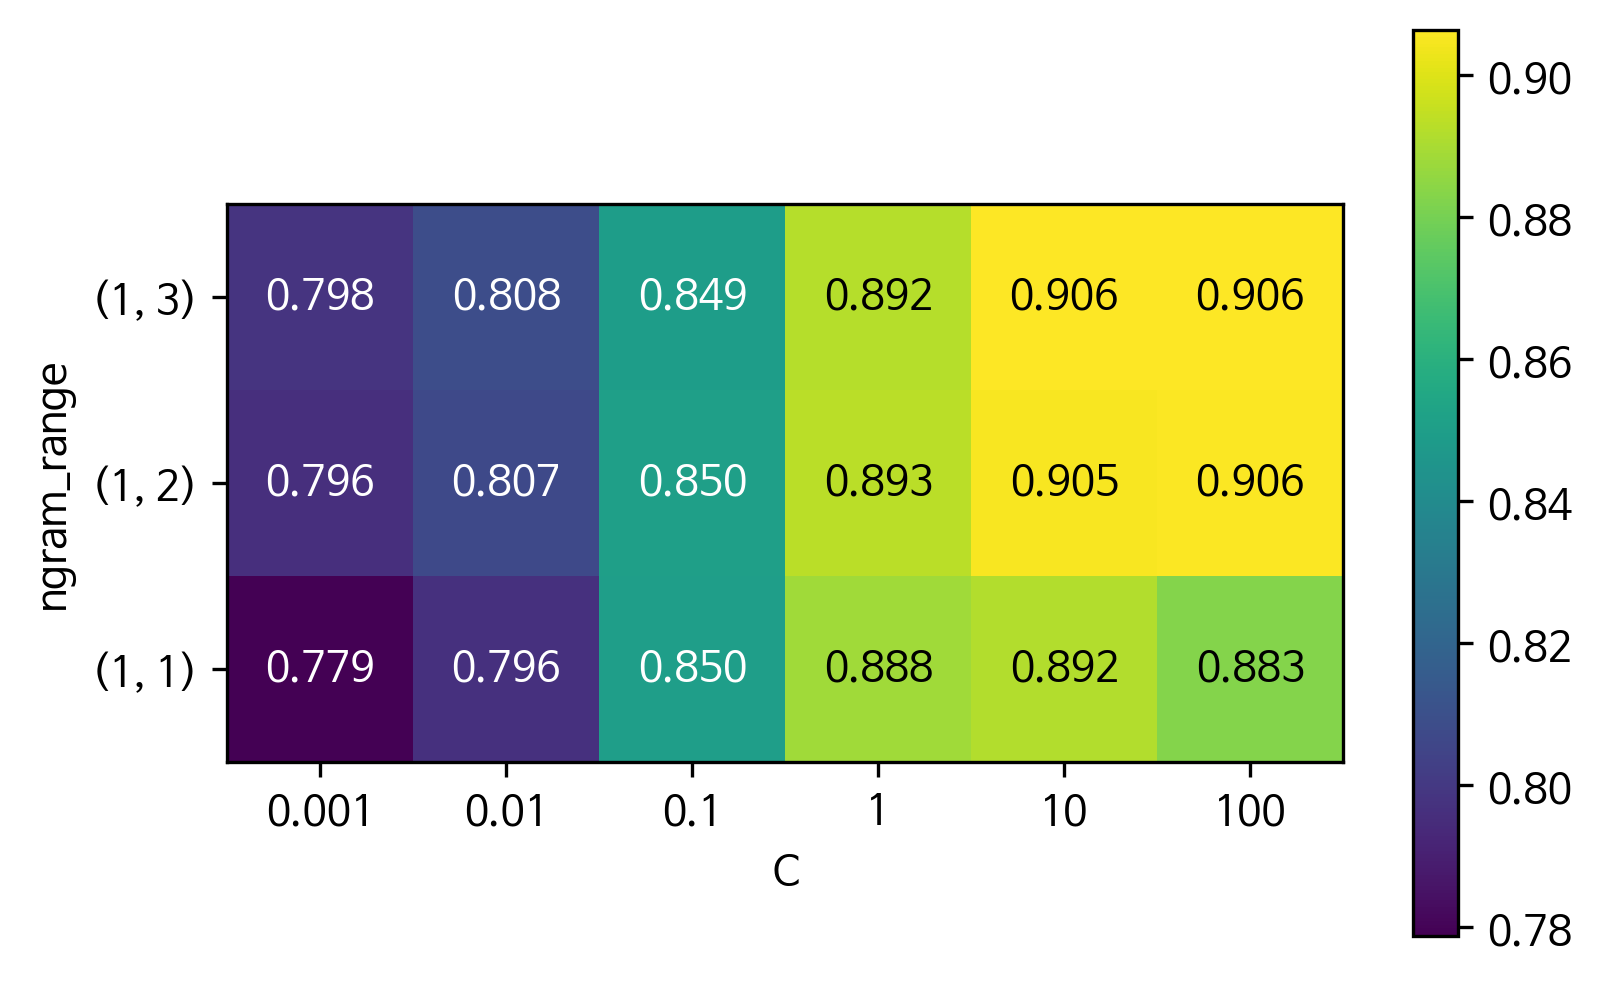

In [39]:
# 그리드 서치에서 테스트 점수를 추출합니다
scores = grid.cv_results_['mean_test_score'].reshape(-1, 3).T
# 히트맵을 그립니다
heatmap = mglearn.tools.heatmap(
    scores, xlabel="C", ylabel="ngram_range", cmap="viridis", fmt="%.3f",
    xticklabels=param_grid['logisticregression__C'],
    yticklabels=param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)

(-22.0, 22.0)

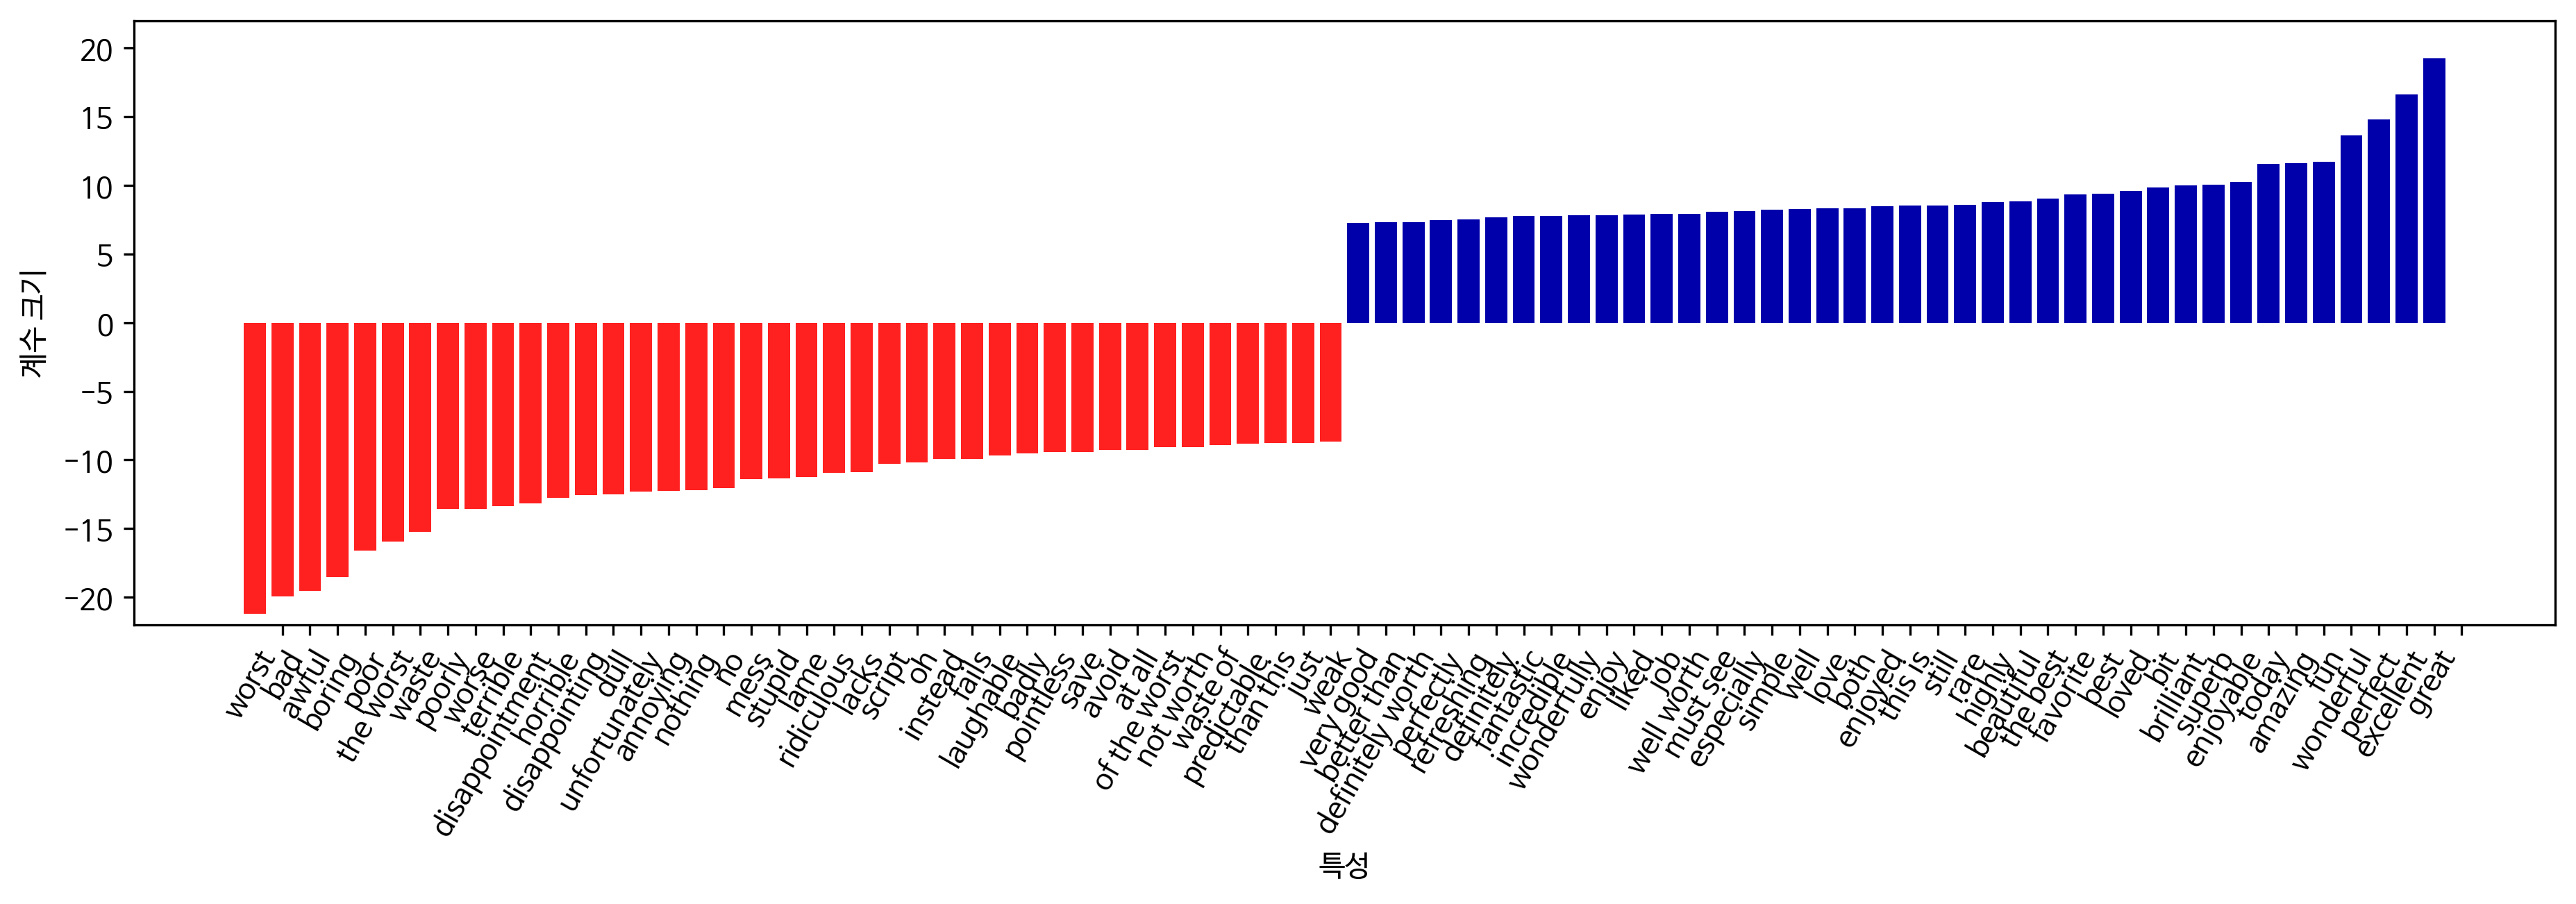

In [40]:
# 특성 이름과 계수를 추출합니다
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
# get_feature_names() 메서드가 1.0에서 deprecated 되었고 1.2 버전에서 삭제될 예정입니다.
# 대신 get_feature_names_out()을 사용합니다.
feature_names = np.array(vect.get_feature_names_out())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef[0], feature_names, n_top_features=40)
plt.ylim(-22, 22)

(-22.0, 22.0)

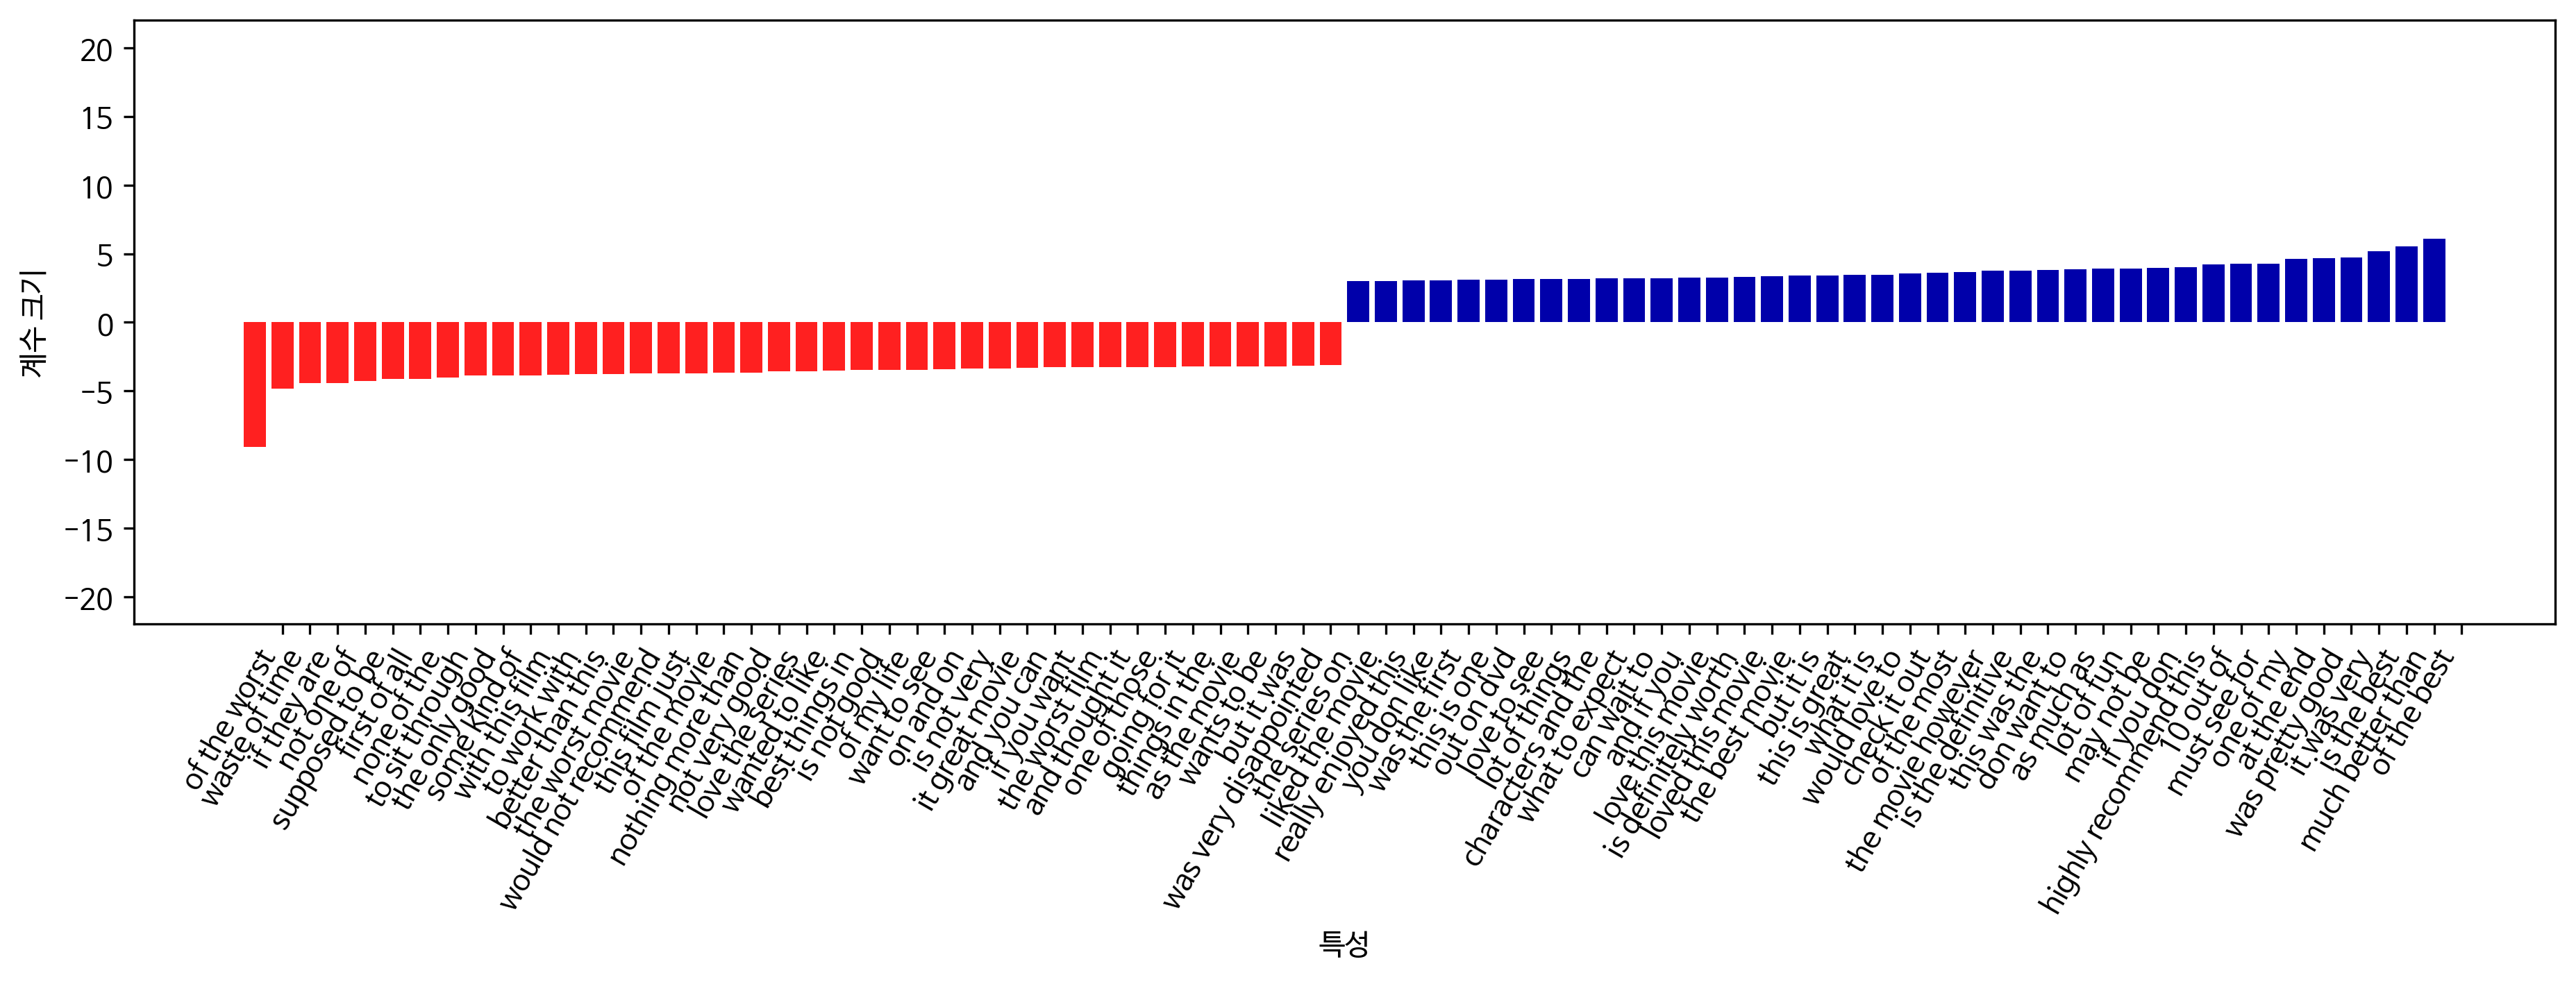

In [41]:
# 트라이그램 특성을 찾습니다
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 3
# 트라이그램 특성만 그래프로 나타냅니다
mglearn.tools.visualize_coefficients(coef.ravel()[mask],
                                     feature_names[mask], n_top_features=40)
plt.ylim(-22, 22)

#### 고급 토큰화, 어간 추출, 표제어 추출

Spacy 영어 모듈을 다운로드하려면 다음 쉘의 주석을 제거하고 실행하세요.

In [42]:
#!python -m spacy download en

In [43]:
import spacy
import nltk

# spacy의 영어 모델을 로드합니다
en_nlp = spacy.load('en_core_web_sm')
# nltk의 PorterStemmer 객체를 만듭니다
stemmer = nltk.stem.PorterStemmer()

# spacy의 표제어 추출과 nltk의 어간 추출을 비교하는 함수입니다
def compare_normalization(doc):
    # spacy로 문서를 토큰화합니다
    doc_spacy = en_nlp(doc)
    # spacy로 찾은 표제어를 출력합니다
    print("표제어:")
    print([token.lemma_ for token in doc_spacy])
    # PorterStemmer로 찾은 토큰을 출력합니다
    print("어간:")
    print([stemmer.stem(token.norm_.lower()) for token in doc_spacy])

In [44]:
compare_normalization(u"Our meeting today was worse than yesterday, "
                       "I'm scared of meeting the clients tomorrow.")

표제어:
['our', 'meeting', 'today', 'be', 'bad', 'than', 'yesterday', ',', 'I', 'be', 'scared', 'of', 'meet', 'the', 'client', 'tomorrow', '.']
어간:
['our', 'meet', 'today', 'wa', 'wors', 'than', 'yesterday', ',', 'i', 'am', 'scare', 'of', 'meet', 'the', 'client', 'tomorrow', '.']


In [45]:
# 요구사항: spacy에서 표제어 추출 기능과 CountVectorizer의 토큰 분할기를 사용합니다.

# spacy의 언어 모델을 로드합니다
en_nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# spacy 문서 처리 파이프라인을 사용해 자작 토큰 분할기를 만듭니다
# (우리만의 토큰 분할기를 사용합니다)
def custom_tokenizer(document):
    doc_spacy = en_nlp(document)
    return [token.lemma_ for token in doc_spacy]

# 자작 토큰 분할기를 사용해 CountVectorizer 객체를 만듭니다
lemma_vect = CountVectorizer(tokenizer=custom_tokenizer, min_df=5)

In [46]:
# 표제어 추출이 가능한 CountVectorizer 객체로 text_train을 변환합니다
X_train_lemma = lemma_vect.fit_transform(text_train)
print("X_train_lemma.shape:", X_train_lemma.shape)

# 비교를 위해 표준 CountVectorizer를 사용합니다
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("X_train.shape:", X_train.shape)

X_train_lemma.shape: (25000, 21864)
X_train.shape: (25000, 27271)


In [47]:
# 훈련 세트의 1%만 사용해서 그리드 서치를 만듭니다
from sklearn.model_selection import StratifiedShuffleSplit

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.99,
                            train_size=0.01, random_state=0)
grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=cv)
# 기본 CountVectorizer로 그리드 서치를 수행합니다
grid.fit(X_train, y_train)
print("최상의 크로스 밸리데이션 점수 "
      "(기본 CountVectorizer): {:.3f}".format(grid.best_score_))
# 표제어를 사용해서 그리드 서치를 수행합니다
grid.fit(X_train_lemma, y_train)
print("최상의 크로스 밸리데이션 점수 "
      "(표제어): {:.3f}".format(grid.best_score_))

최상의 크로스 밸리데이션 점수 (기본 CountVectorizer): 0.719
최상의 크로스 밸리데이션 점수 (표제어): 0.715


### 토픽 모델링과 문서 군집화
#### LDA

In [48]:
vect = CountVectorizer(max_features=10000, max_df=.15)
X = vect.fit_transform(text_train)

In [49]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, learning_method="batch",
                                max_iter=25, random_state=0)
# 모델 생성과 변환을 한 번에 합니다
# 변환 시간이 좀 걸리므로 시간을 절약하기 위해 동시에 처리합니다
document_topics = lda.fit_transform(X)

In [50]:
print("lda.components_.shape:", lda.components_.shape)

lda.components_.shape: (10, 10000)


In [51]:
# 토픽마다(components_의 행) 특성을 오름차순으로 정렬합니다
# 내림차순이 되도록 [:, ::-1] 사용해 행의 정렬을 반대로 바꿉니다
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
# get_feature_names() 메서드가 1.0에서 deprecated 되었고 1.2 버전에서 삭제될 예정입니다.
# 대신 get_feature_names_out()을 사용합니다.
# CountVectorizer 객체에서 특성 이름을 구합니다.
feature_names = np.array(vect.get_feature_names_out())

In [52]:
# 10개의 토픽을 출력합니다
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
between       war           funny         show          didn          
young         world         worst         series        saw           
family        us            comedy        episode       am            
real          our           thing         tv            thought       
performance   american      guy           episodes      years         
beautiful     documentary   re            shows         book          
work          history       stupid        season        watched       
each          new           actually      new           now           
both          own           nothing       television    dvd           
director      point         want          years         got           


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
horr

In [53]:
lda100 = LatentDirichletAllocation(n_components=100, learning_method="batch",
                                   max_iter=25, random_state=0)
document_topics100 = lda100.fit_transform(X)

In [54]:
topics = np.array([7, 16, 24, 25, 28, 36, 37, 41, 45, 51, 53, 54, 63, 89, 97])

In [55]:
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
# get_feature_names() 메서드가 1.0에서 deprecated 되었고 1.2 버전에서 삭제될 예정입니다.
# 대신 get_feature_names_out()을 사용합니다.
feature_names = np.array(vect.get_feature_names_out())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      
--------      --------      --------      --------      --------      
thriller      worst         german        car           beautiful     
suspense      awful         hitler        gets          young         
horror        boring        nazi          guy           old           
atmosphere    horrible      midnight      around        romantic      
mystery       stupid        joe           down          between       
house         thing         germany       kill          romance       
director      terrible      years         goes          wonderful     
quite         script        history       killed        heart         
bit           nothing       new           going         feel          
de            worse         modesty       house         year          
performances  waste         cowboy        away          each          
dark          pretty        jewish        head          french        
twist 

In [56]:
# 음악적인 토픽 45를 가중치로 정렬합니다
music = np.argsort(document_topics100[:, 45])[::-1]
# 이 토픽이 가장 비중이 큰 문서 다섯개를 출력합니다
for i in music[:10]:
    # 첫 두 문장을 출력합니다
    print(b".".join(text_train[i].split(b".")[:2]) + b".\n")

b'I love this movie and never get tired of watching. The music in it is great.\n'
b"I enjoyed Still Crazy more than any film I have seen in years. A successful band from the 70's decide to give it another try.\n"
b'Hollywood Hotel was the last movie musical that Busby Berkeley directed for Warner Bros. His directing style had changed or evolved to the point that this film does not contain his signature overhead shots or huge production numbers with thousands of extras.\n'
b"What happens to washed up rock-n-roll stars in the late 1990's? They launch a comeback / reunion tour. At least, that's what the members of Strange Fruit, a (fictional) 70's stadium rock group do.\n"
b'As a big-time Prince fan of the last three to four years, I really can\'t believe I\'ve only just got round to watching "Purple Rain". The brand new 2-disc anniversary Special Edition led me to buy it.\n'
b"This film is worth seeing alone for Jared Harris' outstanding portrayal of John Lennon. It doesn't matter that H

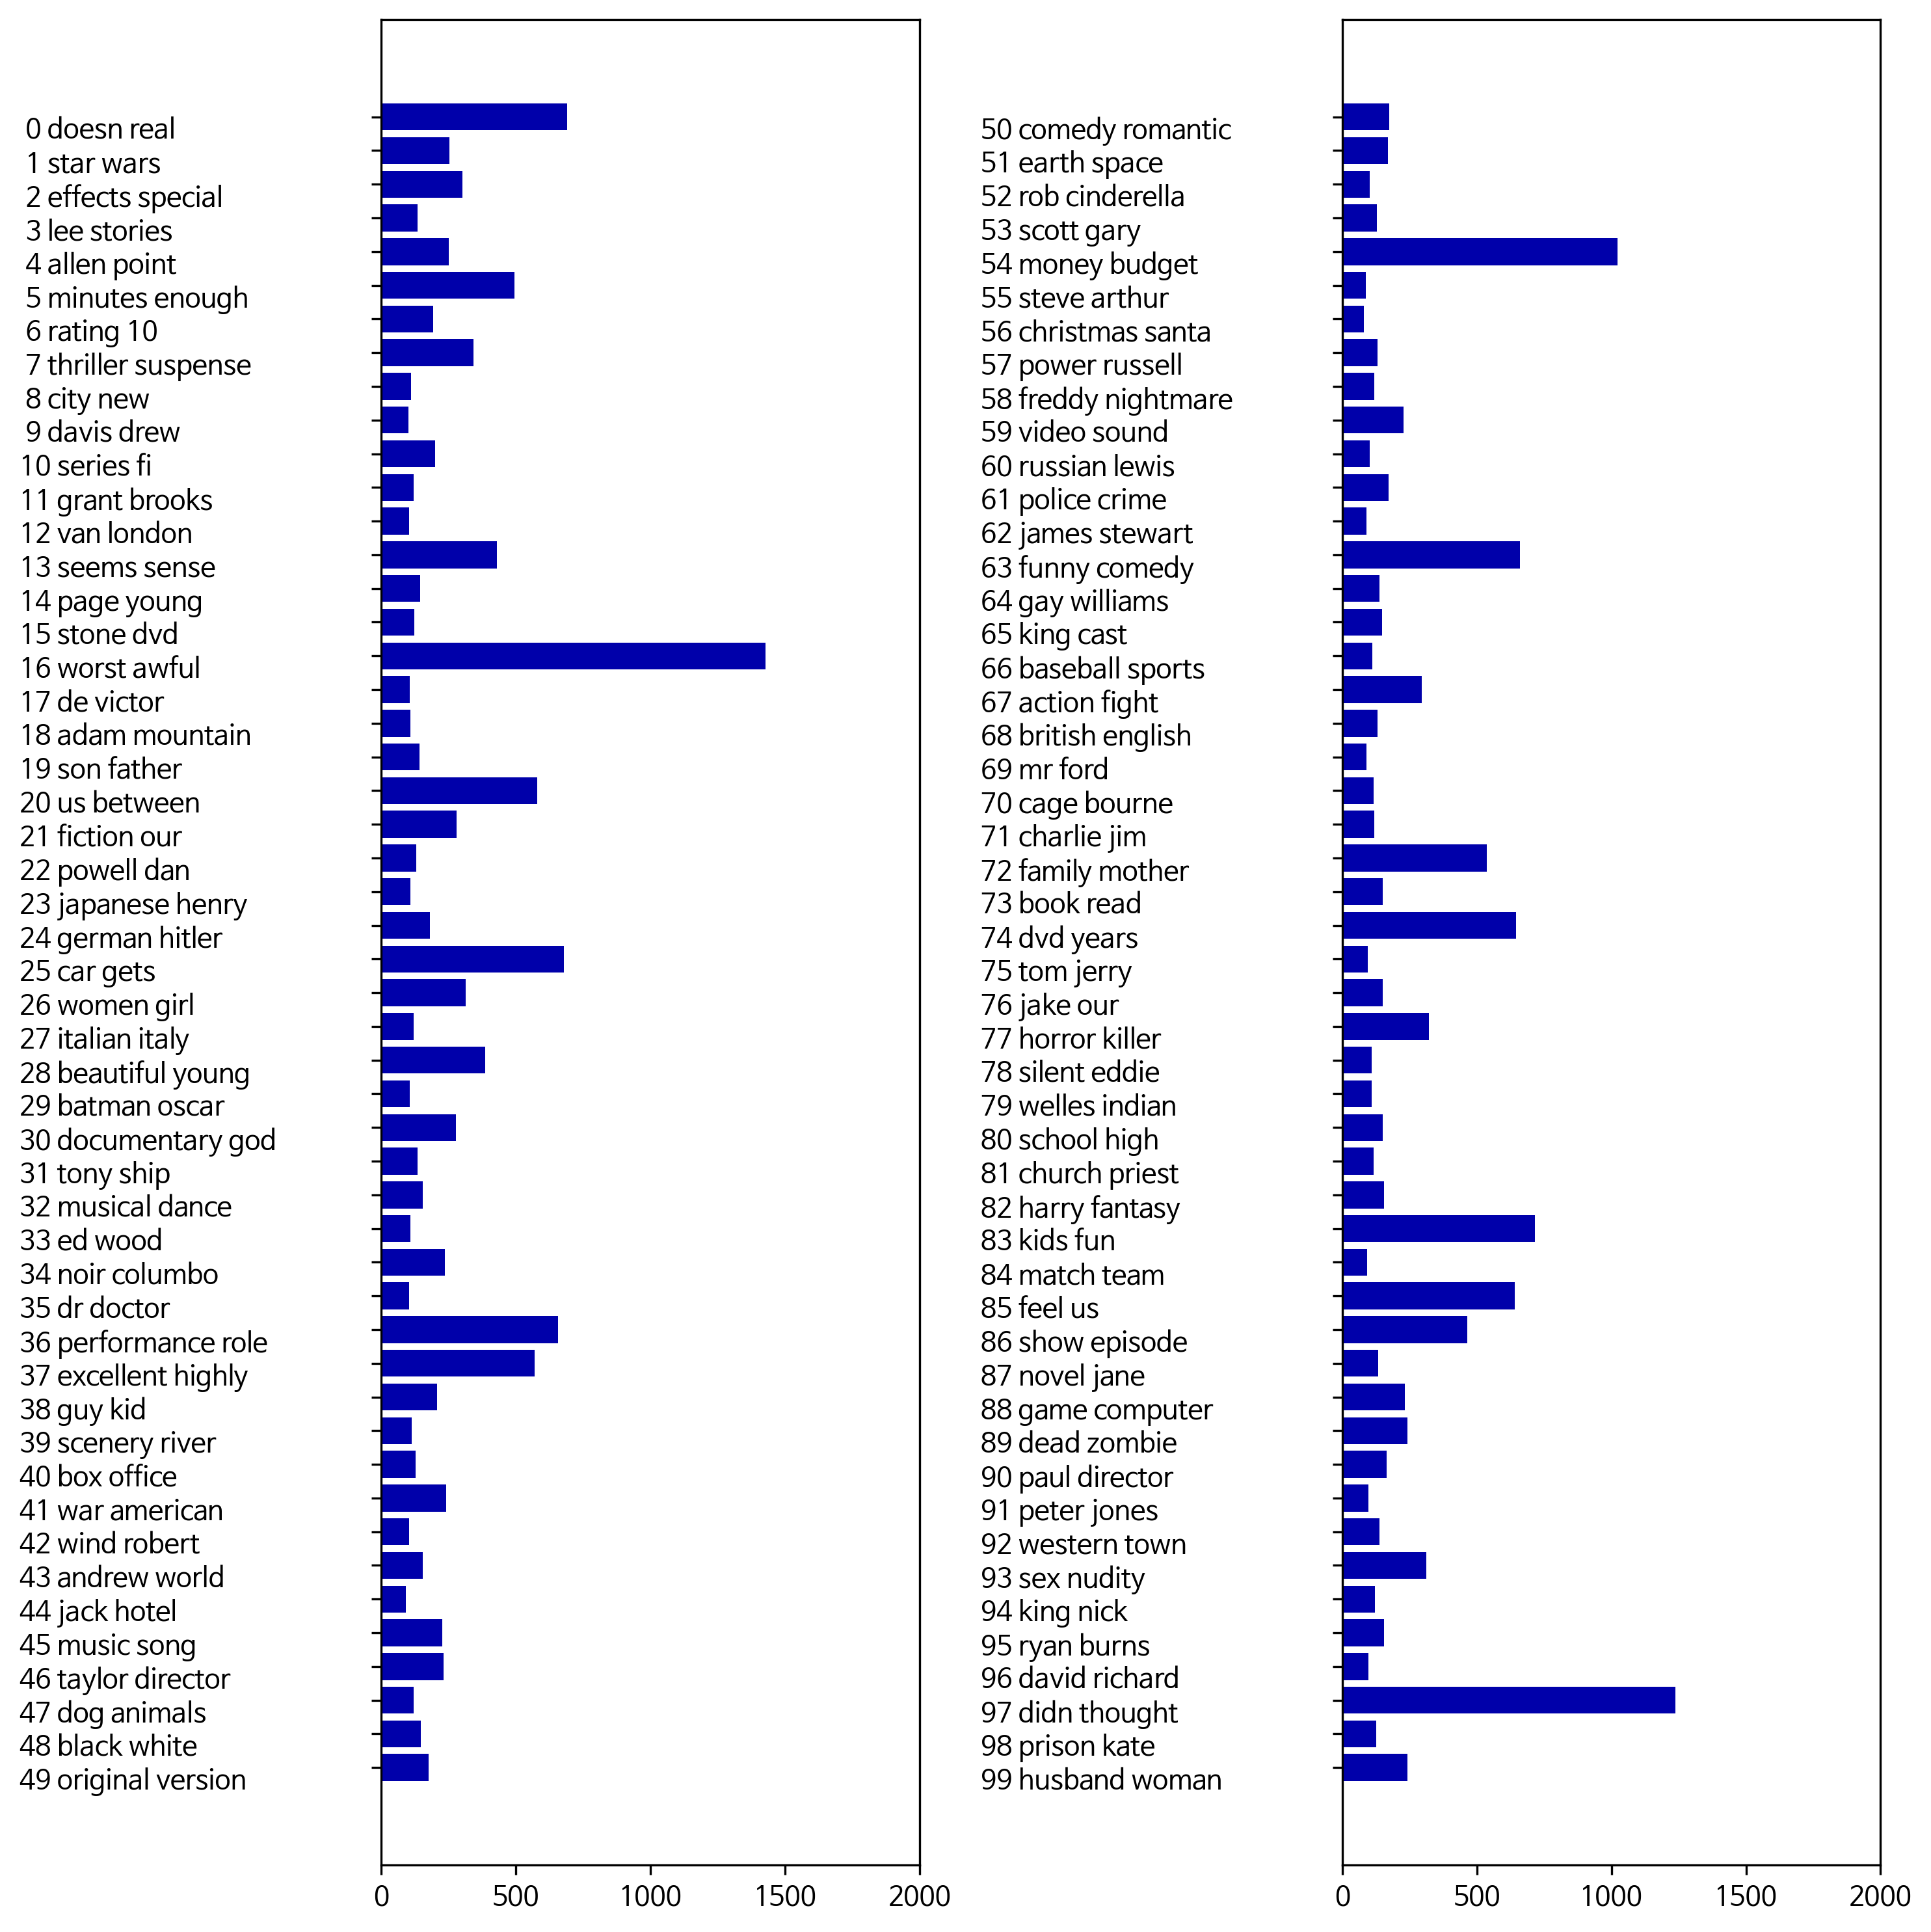

In [57]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2} ".format(i) + " ".join(words)
               for i, words in enumerate(feature_names[sorting[:, :2]])]
# 두 개의 열이 있는 막대 그래프
for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()